# Telecom Churn Case Study

## Problem Statement

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully. Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

#### Definitions of Churn

There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, you will use the usage-based definition to define churn.

#### high Value Churn

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

#### Understanding the business objective and the data


The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

#### Understanding customer behaviour during churn


Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### Importing Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing pandas EDA tool
# import pandas_profiling as pp
# from pandas_profiling import ProfileReport

In [4]:
# Diplaying all columns without resptriction
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1)

### Importing Telecom Churn Dataset

In [5]:
# Reading the csv file
telecom_data = pd.read_csv("telecom_churn_data.csv")

In [6]:
# Display first 10 rows
telecom_data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [7]:
# Dimensions of the dataset
telecom_data.shape

(99999, 226)

In [8]:
# Checking the data information
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [9]:
# We need to convert date columns to datetime format as they are in object format
date_cols = telecom_data.select_dtypes(include=['object'])

In [10]:
print(date_cols.columns)

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


In [11]:
# converting the selected columns to datetime format
for i in date_cols.columns:
    telecom_data[i] = pd.to_datetime(telecom_data[i])

In [12]:
telecom_data.shape

(99999, 226)

### Checking the description of the data

In [13]:
telecom_data.describe().T

,count,mean,min,25%,50%,75%,max,std
mobile_number,99999.0,7001207270.387544,7000000074.0,7000606232.5,7001204632.0,7001812030.5,7002410905.0,695669.38629
circle_id,99999.0,109.0,109.0,109.0,109.0,109.0,109.0,0.0
loc_og_t2o_mou,98981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,98981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,98981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,99999,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,NaN
last_date_of_month_7,99398,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,NaN
last_date_of_month_8,98899,2014-08-30 23:59:59.999999744,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,NaN
last_date_of_month_9,98340,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,NaN
arpu_6,99999.0,282.987358,-2258.709,93.4115,197.704,371.06,27731.088,328.43977


In [14]:
# Dropping the columns which as only 1 values across all the records
unique_cols = []
for i in telecom_data.columns:
    if telecom_data[i].nunique() == 1:
        unique_cols.append(i)
    else:
        continue

In [15]:
unique_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [16]:
# Dropping the unique columns
telecom_data.drop(unique_cols, axis=1, inplace=True)

In [17]:
# Checking the dimensions of the data now
telecom_data.shape

(99999, 210)

In [18]:
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

#### Handling Missing values

In [19]:
# Checking the percent of missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

if the columms total_rech_data and max_rech_data has missing values and the columns date_of_last_rech_data also has missing values it can be deduced that the the former columns has meaningful missing values. We can impute the missing values of such columns to 0 for all the months. It means that the customer has not done any recharge for mobile internet.

In [20]:
start_time = time.time()
for i in range(len(telecom_data)):
    # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((telecom_data['total_rech_data_6'][i]) and (telecom_data['max_rech_data_6'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_6'][i]):
            telecom_data['total_rech_data_6'][i] = 0
            telecom_data['max_rech_data_6'][i] = 0

    # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((telecom_data['total_rech_data_7'][i]) and (telecom_data['max_rech_data_7'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_7'][i]):
            telecom_data['total_rech_data_7'][i] = 0
            telecom_data['max_rech_data_7'][i] = 0

    # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((telecom_data['total_rech_data_8'][i]) and (telecom_data['max_rech_data_8'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_6'][i]):
            telecom_data['total_rech_data_8'][i] = 0
            telecom_data['max_rech_data_8'][i] = 0

    # Handling 'total_rech_data', 'max_rech_data' and for month 9
    if pd.isnull((telecom_data['total_rech_data_9'][i]) and (telecom_data['max_rech_data_9'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_9'][i]):
            telecom_data['total_rech_data_9'][i] = 0
            telecom_data['max_rech_data_9'][i] = 0

end_time = time.time()
print('\nExecution Time = ', round(end_time-start_time, 2), "seconds")


Execution Time =  215.89 seconds


##### Handling missing values for count_rech_2g_*, count_rech_3g_* for months 6, 7, 8, 9

The columns total_rech_data_* is the sum of count_rech_2g_*, count_rech_3g_* for all months. To prevent multicollinearity we can drop these columns

In [21]:
# Dropping the columns 'count_rech_2g_*', 'count_rech_3g_8' for months 6,7,8,9
telecom_data.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'], axis=1, inplace=True)

In [22]:
telecom_data.shape

(99999, 202)

##### Handling the mising values for the attributes arpu_3g_*, arpu_2g_* for month 6, 7, 8, 9

Correlation table for month 6




<Axes: >

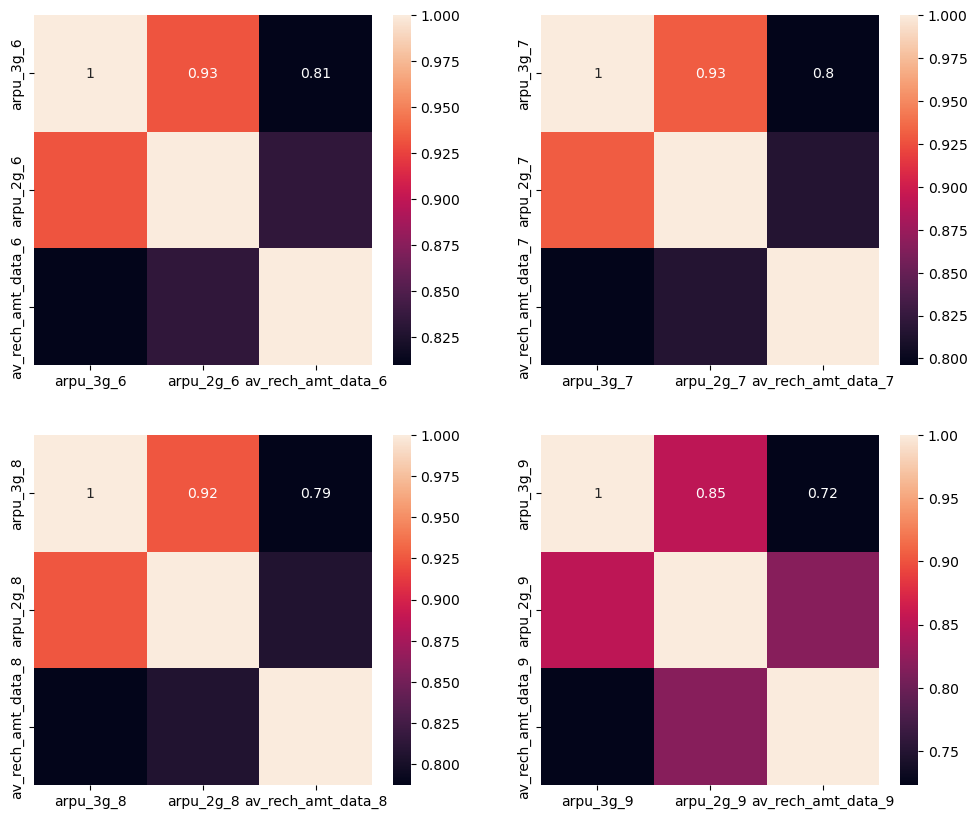

In [23]:
# Chceking the correlation between the above columns for month 6,7,8,9
print("Correlation table for month 6\n\n")
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(telecom_data[['arpu_3g_6', 'arpu_2g_6', 'av_rech_amt_data_6']].corr(), annot=True)
plt.subplot(2, 2, 2)
sns.heatmap(telecom_data[['arpu_3g_7', 'arpu_2g_7', 'av_rech_amt_data_7']].corr(), annot=True)
plt.subplot(2, 2, 3)
sns.heatmap(telecom_data[['arpu_3g_8', 'arpu_2g_8', 'av_rech_amt_data_8']].corr(), annot=True)
plt.subplot(2, 2, 4)
sns.heatmap(telecom_data[['arpu_3g_9', 'arpu_2g_9', 'av_rech_amt_data_9']].corr(), annot=True)

From the correlation table we can see that clumns arpu_2g_* an d arpu_3g_* for each month 6, 7, 8, 9 is highly correlated to the attribute av_rech_amt_data_*.
we shall drop the columns arpu_2g_* and arpu_3g_*

In [24]:
# Dropping the columns 'arpu_3g_*' and 'arpu_2g_*' in month 6,7,8,9
telecom_data.drop(['arpu_2g_6', 'arpu_3g_6',
                   'arpu_2g_7', 'arpu_3g_7',
                  'arpu_2g_8', 'arpu_3g_8',
                  'arpu_2g_9', 'arpu_3g_9'], axis=1, inplace=True)

In [25]:
telecom_data.shape

(99999, 194)

##### handling missing values for the attribute av_rech_amt_data_* for month 6,7,8,9

If the total recharge amount for the columns total_rech_data_* is 0 we van impute the missing values of columns av_rech_amt_data_* to be 0 

In [26]:
start_time = time.time()
for i in range(len(telecom_data)):
    # Handling 'av_rech_amt_data' for month 6
    if (pd.isnull(telecom_data['av_rech_amt_data_6'][i]) and (telecom_data['total_rech_data_6'][i]==0)):
        telecom_data['av_rech_amt_data_6'][i] = 0

    # Handling 'av_rech_amt_data' for month 7
    if (pd.isnull(telecom_data['av_rech_amt_data_7'][i]) and (telecom_data['total_rech_data_7'][i]==0)):
        telecom_data['av_rech_amt_data_7'][i] = 0

    # Handling 'av_rech_amt_data' for month 8
    if (pd.isnull(telecom_data['av_rech_amt_data_8'][i]) and (telecom_data['total_rech_data_8'][i]==0)):
        telecom_data['av_rech_amt_data_8'][i] = 0

    # Handling 'av_rech_amt_data' for month 9
    if (pd.isnull(telecom_data['av_rech_amt_data_9'][i]) and (telecom_data['total_rech_data_9'][i]==0)):
        telecom_data['av_rech_amt_data_9'][i] = 0

end_time = time.time()
print("\nExecution Time = ", round(end_time-start_time, 2), 'seconds')


Execution Time =  115.11 seconds


In [27]:
# Deleting atributes with high missing values percentages
telecom_data.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
                   'night_pck_user_6', 'night_pck_user_7','night_pck_user_8','night_pck_user_9'], axis=1, inplace=True)

In [28]:
telecom_data.shape

(99999, 186)

In [29]:
# Checking the Overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
loc_og_t2c_mou_9            7.75 
loc_og_t2t_mou_9            7.75 
roam_og_mou_9               7.75 
std_og_t2m_mou_9            7.75 
std_ic_t2t_mou_9            7.75 
std_og_t2t_mou_9            7.75 
std_ic_t2m_mou_9            7.75 
spl_ic_mou_9                7.75 
isd_ic_mou_9                7.75 
loc_og_mou_9                7.75 
loc_og_t2m_mou_9            7.75 
std_ic_t2f_mou_9            7.75 
std_og_t2f_mou_9            7.75 
std_og_mou_9                7.75 
loc_ic_mou_9                7.75 
roam_ic_mou_9               7.75 
loc_og_t2f_mou_9            7.75 
loc_ic_t2f_mou_9            7.75 
ic_others_9                 7.75 
offnet_mou_9                7.75 
isd_og_mou_9                7.75 
spl_og_mou_9                7.75 
onnet_mou_9                 7.75 
loc_ic_t2m_mou_9            7.75 
og_others_9                 7.75 
loc_ic_t2t_mou

In [30]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(144), int64(34)
memory usage: 141.9 MB


Since we have imputed the columns total_rech_data_* and max_rech_data_*, the columns date_of_last_rech_data_* can be dropped

In [31]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'], axis=1, inplace=True)
# Similarlu dropping columns date_of_last_rech_*
telecom_data.drop(['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'], axis=1, inplace=True)

In [32]:
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

std_ic_t2t_mou_9      7.75
loc_og_mou_9          7.75
loc_og_t2t_mou_9      7.75
loc_og_t2m_mou_9      7.75
spl_ic_mou_9          7.75
spl_og_mou_9          7.75
loc_ic_t2t_mou_9      7.75
loc_og_t2c_mou_9      7.75
std_ic_t2m_mou_9      7.75
std_og_t2t_mou_9      7.75
roam_og_mou_9         7.75
std_ic_mou_9          7.75
std_og_t2m_mou_9      7.75
std_og_t2f_mou_9      7.75
og_others_9           7.75
std_og_mou_9          7.75
isd_og_mou_9          7.75
std_ic_t2f_mou_9      7.75
loc_ic_t2m_mou_9      7.75
loc_og_t2f_mou_9      7.75
ic_others_9           7.75
onnet_mou_9           7.75
roam_ic_mou_9         7.75
loc_ic_mou_9          7.75
offnet_mou_9          7.75
isd_ic_mou_9          7.75
loc_ic_t2f_mou_9      7.75
av_rech_amt_data_8    7.68
max_rech_data_8       7.68
total_rech_data_8     7.68
std_og_t2f_mou_8      5.38
std_og_t2m_mou_8      5.38
onnet_mou_8           5.38
std_ic_mou_8          5.38
roam_og_mou_8         5.38
loc_ic_mou_8          5.38
std_og_t2t_mou_8      5.38
s

### Filtering High Value Customers from Good Phase

filtering as per the total revenue generated per user

In [33]:
# calculating total_rech_amt for data along from avg_rech_amt
telecom_data['total_rech_amt_data_6'] = telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
telecom_data['total_rech_amt_data_7'] = telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']

# Calculating the overall recharge amount for month 6,7
telecom_data['overall_rech_amt_6'] = telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_6']
telecom_data['overall_rech_amt_7'] = telecom_data['total_rech_amt_data_7'] + telecom_data['total_rech_amt_7']

# Calculating avg recharge done by customer in month 6 and 7
telecom_data['avg_rech_amt_6_7'] = (telecom_data['overall_rech_amt_6'] + telecom_data['overall_rech_amt_7'])/2

# Finding the value of 70th percentile in the overall revenue for difining high value customer
cut_off = telecom_data['avg_rech_amt_6_7'].quantile(0.70)

# Filtering the data to the top 30% as high value customers
telecom_data = telecom_data[telecom_data['avg_rech_amt_6_7'] >= cut_off]

In [34]:
print(cut_off)

478.0


In [35]:
telecom_data.shape

(30001, 183)

In [36]:
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

av_rech_amt_data_8       12.44
max_rech_data_8          12.44
total_rech_data_8        12.44
loc_og_t2f_mou_9         6.34 
loc_ic_mou_9             6.34 
loc_og_t2t_mou_9         6.34 
loc_ic_t2m_mou_9         6.34 
loc_og_t2m_mou_9         6.34 
loc_ic_t2t_mou_9         6.34 
og_others_9              6.34 
loc_og_t2c_mou_9         6.34 
spl_og_mou_9             6.34 
std_ic_t2t_mou_9         6.34 
isd_og_mou_9             6.34 
std_og_mou_9             6.34 
loc_og_mou_9             6.34 
std_og_t2f_mou_9         6.34 
std_og_t2t_mou_9         6.34 
roam_og_mou_9            6.34 
loc_ic_t2f_mou_9         6.34 
std_og_t2m_mou_9         6.34 
spl_ic_mou_9             6.34 
ic_others_9              6.34 
roam_ic_mou_9            6.34 
isd_ic_mou_9             6.34 
std_ic_t2f_mou_9         6.34 
offnet_mou_9             6.34 
std_ic_mou_9             6.34 
std_ic_t2m_mou_9         6.34 
onnet_mou_9              6.34 
std_og_t2f_mou_8         3.91 
ic_others_8              3.91 
std_og_m

### Imputing the remaining Columns

In [37]:
# Selecting numerical Columns
num_col = telecom_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [38]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

# Selecting and tranforming the numerical columns
telecom_data[num_col] = scalar.fit_transform(telecom_data[num_col])

# Calling the KNNImputer function
knn = KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
start_time = time.time()

telecom_data_knn = pd.DataFrame(knn.fit_transform(telecom_data[num_col]))
telecom_data_knn.columns = telecom_data[num_col].columns

end_time = time.time()
print("\nExecution Time = ", round(end_time-start_time, 2), "seconds\n")


Execution Time =  204.06 seconds



In [39]:
# Check for null values after imputaiton for numerical columns
telecom_data_knn.isnull().sum().sum()

0

In [40]:
# restoring the scaled values to its original form
telecom_data[num_col] = scalar.inverse_transform(telecom_data_knn)

telecom_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,23.993333,0.00,27.833333,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,53.27,24.613333,0.00,33.206667,79.27,18.196667,0.00,24.193333,0.403333,4.813333,0.00,2.69,0.353333,0.0,0.00,0.243333,132.953333,47.636667,0.00,60.096667,0.00,0.00,0.00,0.383333,0.41,0.976667,0.00,0.943333,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,1.326667,0.00,0.00,0.00,0.000000,4.14,0.326667,0.00,0.663333,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,44.493333,13.396667,0.16,32.263333,69.183333,62.85,4.13,38.553333,17.74,22.503333,1.15,11.360000,131.433333,98.76,5.44,82.186667,0.00,3.366667,0.00,0.000000,0.583333,0.37,0.00,1.456667,1.243333,1.113333,0.00,1.656667,1.826667,4.853333,0.00,3.116667,0.00,0.00,5.44,0.00,0.043333,0.0,0.0,0.093333,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.203333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,567.160000,325.91,172.050000,16.23,33.49,31.64,4.776667,23.74,12.

In [41]:
# Checking the overall missing vlaues in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number            0.0
isd_ic_mou_8             0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
ic_others_9              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_num_9         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
total_rech_amt_9         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
max_rech_amt_9           0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
isd_ic_mou_9             0.0
isd_ic_mou_7             0.0
total_rech_data_6        0.0
isd_ic_mou_6             0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_9         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_9         0.0
std_ic_mou_6             0.0
std_ic_mou_7             0.0
std_ic_mou_8  

In [42]:
telecom_data.isnull().sum().sum()

0

#### Defining Churn variable

we need to derive churn variable using
total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, and vol_3g_mb_9 columns

In [43]:
# selecting the columns to define churn variable (i.r Target variable)
churn_col = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
telecom_data[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [44]:
# Initialising churn variable
telecom_data['churn']=0

# Imputing the churn variable based on the condition
telecom_data['churn'] = np.where(telecom_data[churn_col].sum(axis=1) == 0, 1, 0)

In [45]:
telecom_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,23.993333,0.00,27.833333,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,53.27,24.613333,0.00,33.206667,79.27,18.196667,0.00,24.193333,0.403333,4.813333,0.00,2.69,0.353333,0.0,0.00,0.243333,132.953333,47.636667,0.00,60.096667,0.00,0.00,0.00,0.383333,0.41,0.976667,0.00,0.943333,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,1.326667,0.00,0.00,0.00,0.000000,4.14,0.326667,0.00,0.663333,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,44.493333,13.396667,0.16,32.263333,69.183333,62.85,4.13,38.553333,17.74,22.503333,1.15,11.360000,131.433333,98.76,5.44,82.186667,0.00,3.366667,0.00,0.000000,0.583333,0.37,0.00,1.456667,1.243333,1.113333,0.00,1.656667,1.826667,4.853333,0.00,3.116667,0.00,0.00,5.44,0.00,0.043333,0.0,0.0,0.093333,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.203333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,567.160000,325.91,172.050000,16.23,33.49,31.64,4.776667,2

In [46]:
# Churn percentage

In [47]:
(telecom_data['churn'].value_counts()/len(telecom_data))*100

churn
0    91.863605
1    8.136395 
Name: count, dtype: float64

91% of the customers o not churn, there is a possibility of class imbalance

since the variable churn it the target variable, all the columns relating to this variable (i.e., columns with suffix _9) can be dropped from the dataset

In [48]:
# Selecting all the churn phase columns tp drop them
churn_phase_cols = [col for col in telecom_data.columns if '_9' in col]
print(churn_phase_cols)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [49]:
# Dropping the churn phase columns
telecom_data.drop(churn_phase_cols, axis=1, inplace=True)

In [50]:
telecom_data.shape

(30001, 141)

As we derived few columns in the good phase earlier, we can drop these columns related columns during creation

In [51]:
telecom_data.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

we can also create columns for defining the good phse variable and drop the seperate 6th and 7th month variables

##### Check the collinearity of the independent variables and try to understand theit dependencies


In [52]:
mon_6_cols = [col for col in telecom_data.columns if '_6' in col]
mon_7_cols = [col for col in telecom_data.columns if '_7' in col]
mon_8_cols = [col for col in telecom_data.columns if '_8' in col]

In [57]:
# Checking the correlation amongst the independent variables, drop the highly correlated ones
telecom_data_corr = telecom_data.corr()
telecom_data_corr.loc[:,:] = np.tril(telecom_data_corr, k=-1)
telecom_data_corr = telecom_data_corr.stack()
telecom_data_corr
telecom_data_corr[(telecom_data_corr > 0.80) | (telecom_data_corr) < -0.8].sort_values(ascending=False)

Series([], dtype: float64)

In [58]:
col_to_drop = ['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# THese columns are highly colineared with other predictor variables
# Criteria set is for collinearity of 85%

# dropping these columns
telecom_data.drop(col_to_drop, axis=1, inplace=True)

KeyError: "['total_rech_amt_8', 'isd_og_mou_8', 'isd_og_mou_7', 'sachet_2g_8', 'total_ic_mou_6', 'total_ic_mou_8', 'total_ic_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8'] not found in axis"

In [59]:
telecom_data.shape

(30001, 121)

#### Deriving new variables to understand the data

In [62]:
(telecom_data['aon']/30).round(0)

0        32.0 
7        27.0 
8        10.0 
21       24.0 
23       20.0 
33       44.0 
38       38.0 
41       67.0 
48       42.0 
53       23.0 
56       24.0 
57       104.0
61       38.0 
67       39.0 
69       20.0 
73       76.0 
77       63.0 
86       16.0 
87       107.0
91       24.0 
92       108.0
96       32.0 
101      12.0 
102      58.0 
103      30.0 
104      10.0 
105      16.0 
111      11.0 
115      98.0 
124      17.0 
131      67.0 
133      41.0 
134      34.0 
146      44.0 
147      110.0
149      96.0 
154      83.0 
157      67.0 
158      18.0 
170      66.0 
171      40.0 
172      8.0  
173      116.0
176      34.0 
177      44.0 
184      16.0 
185      99.0 
188      8.0  
191      26.0 
193      26.0 
195      80.0 
199      38.0 
204      14.0 
206      16.0 
208      10.0 
212      24.0 
213      112.0
218      19.0 
224      37.0 
225      19.0 
226      51.0 
235      114.0
241      10.0 
242      116.0
244      28.0 
246      90.0 
252      5

In [63]:
# we have a column called 'aon'
# We can derive new variable form this to explain th data w.r.t churn.
# Creating  a new variable 'tenure'
telecom_data['tenure'] = (telecom_data['aon']/30).round(0)

In [64]:
# Since we derived a new columns form 'aon', we can drop it
telecom_data.drop('aon', axis=1, inplace=True)

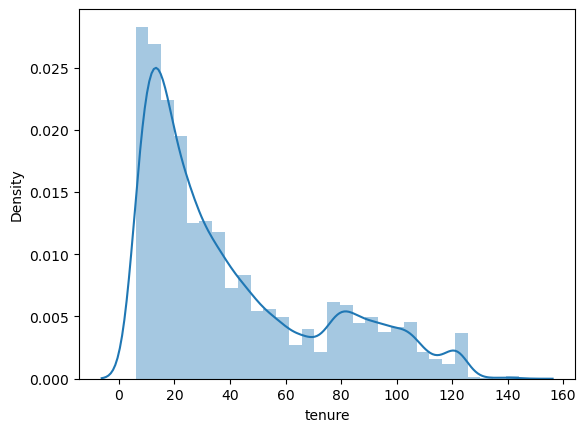

In [65]:
# Checking hte distribution of the teunure varibale
sns.distplot(telecom_data['tenure'], bins=30)
plt.show()

In [66]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_data['tenure_range'] = pd.cut(telecom_data['tenure'], tn_range, labels=tn_label)
telecom_data['tenure_range'].head()

0     2-5 Yrs    
7     2-5 Yrs    
8     6-12 Months
21    1-2 Yrs    
23    1-2 Yrs    
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

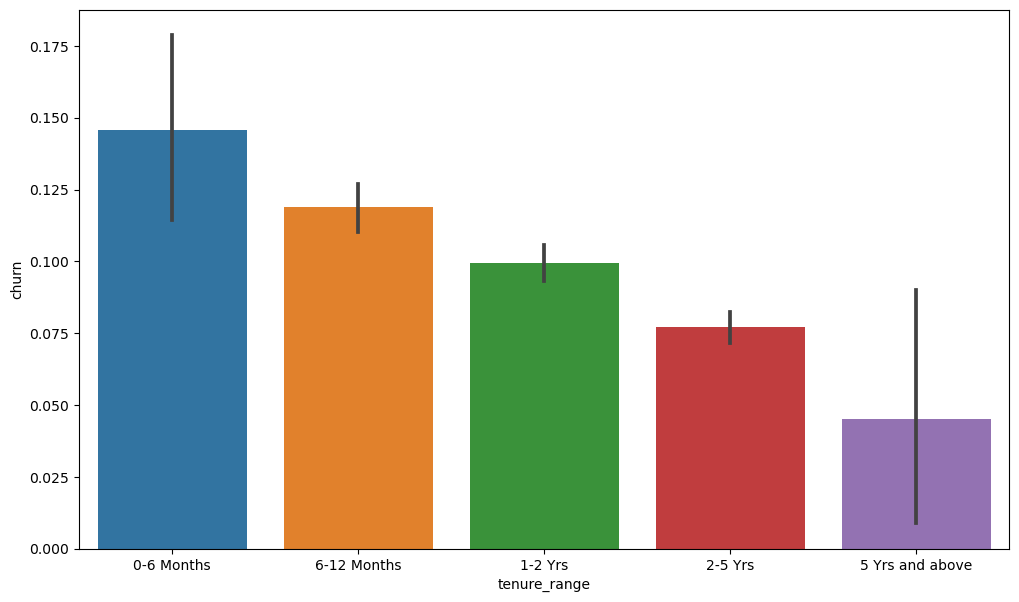

In [67]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=telecom_data)
plt.show()

it can be seen that maximum churn rate happens within 0-6 months, but it gradually decreases as the customer retains in the network

THe avrage revenue per user is good phase of customer is ginve by by arpu_6 and arpu_7.since we have two sepearate averages, taking the average of these two and drop other columns

In [68]:
telecom_data['avg_arpu_6_7'] = (telecom_data['arpu_6'] + telecom_data['arpu_7'])/2
telecom_data['avg_arpu_6_7'].head()

0     206.1005 
7     1209.5150
8     435.4720 
21    556.1030 
23    134.1235 
Name: avg_arpu_6_7, dtype: float64

In [69]:
# dropping the orinignal column as new columns are derived from them
telecom_data.drop(['arpu_6', 'arpu_7'], axis=1, inplace=True)

In [70]:
telecom_data.shape

(30001, 121)

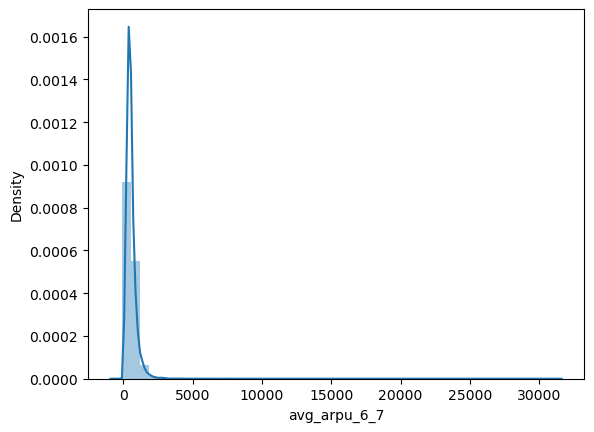

In [71]:
# visualising the created columns
sns.distplot(telecom_data['avg_arpu_6_7'])
plt.show()

In [75]:
# # Checking the correlation bw target variable with other variable in the dataset
# plt.figure(figsize=(10, 50))
# heatmap_churn = sns.heatmap(telecom_data.corr()[['churn']].sort_values(ascending=False, by='churn'), annot=True, cmap='summer')
# heatmap_churn.set_title('Features Correlating with churn varible', fontsize=15)

ValueError: could not convert string to float: '2-5 Yrs'

<Figure size 1000x5000 with 0 Axes>

<Axes: xlabel='total_rech_num_8', ylabel='arpu_8'>

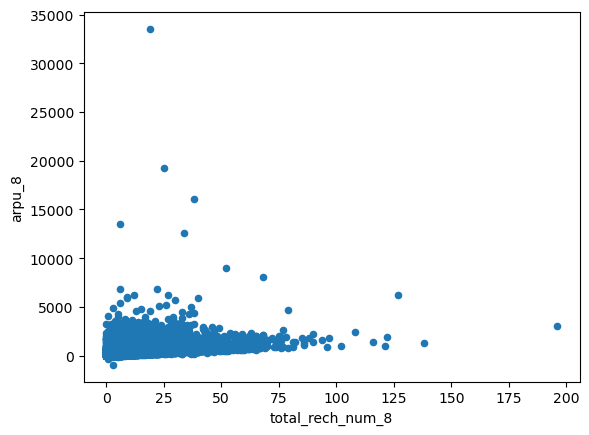

In [76]:
# sctter plot between total recharge and avg revenue for the 8th month
telecom_data[['total_rech_num_8', 'arpu_8']].plot.scatter(x='total_rech_num_8', y='arpu_8')

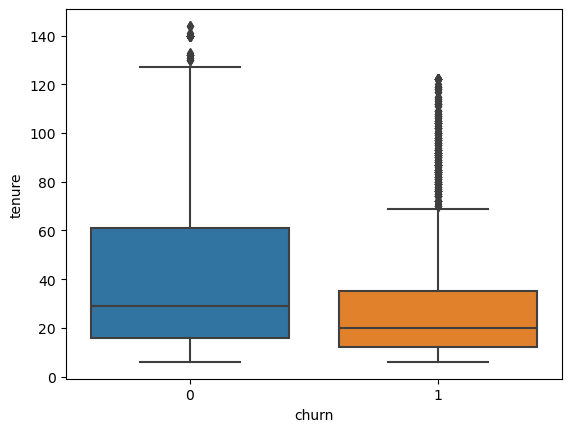

In [77]:
sns.boxplot(x = telecom_data.churn, y = telecom_data.tenure)

plt.show()

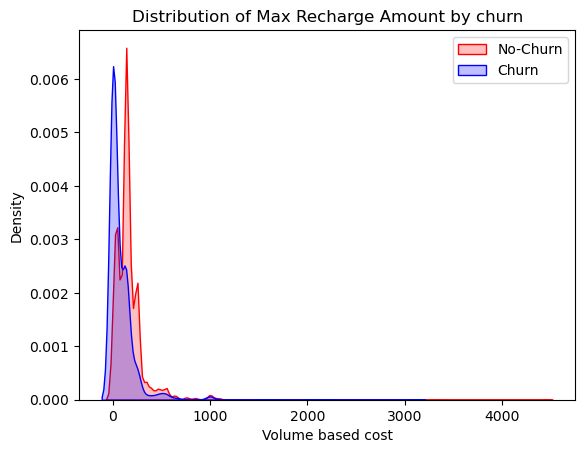

In [78]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(telecom_data.max_rech_amt_8[(telecom_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.max_rech_amt_8[(telecom_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

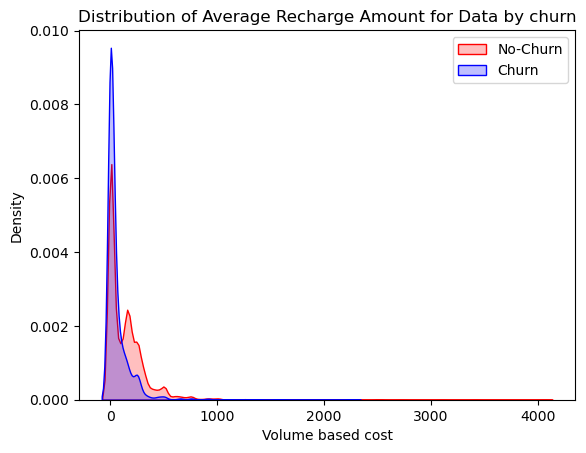

In [79]:
# churn vs max rechare amount
ax = sns.kdeplot(telecom_data.av_rech_amt_data_8[(telecom_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.av_rech_amt_data_8[(telecom_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [84]:
# Creating categories for month 8 columns totalrecharge and their count
telecom_data['total_rech_data_group_8'] = pd.cut(telecom_data['total_rech_data_8'], [-1, 0, 10, 25, 100], labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
telecom_data['total_rech_num_group_8']=pd.cut(telecom_data['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

AttributeError: 'numpy.int32' object has no attribute 'startswith'

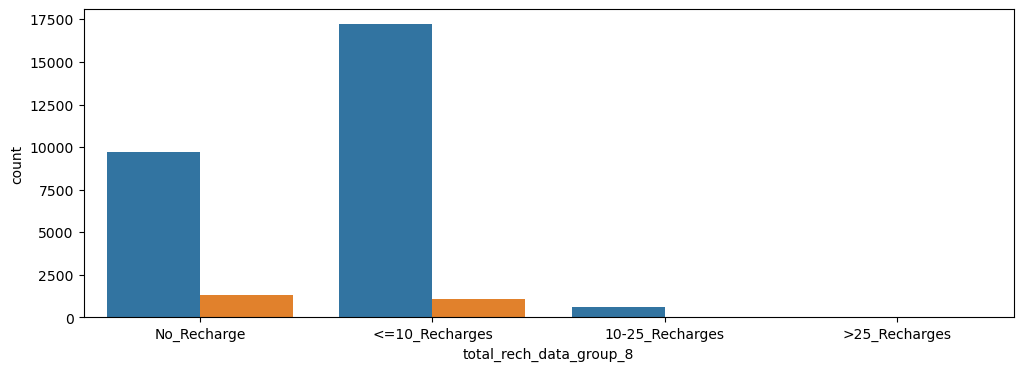

In [85]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",telecom_data['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",telecom_data['total_rech_num_group_8'].value_counts())
plt.show()

In [120]:
# Creting dummy variable for some of the categorical variables and dropiing the first one
dummy = pd.get_dummies(telecom_data[['total_rech_data_group_8', 'total_rech_num_group_8', 'tenure_range']], drop_first=True, dtype=int)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [121]:
# Adding the results to the main DF
telecom_data = pd.concat([telecom_data, dummy], axis=1)
telecom_data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,32.0,2-5 Yrs,206.1005,<=10_Recharges,<=10_Recharges,True,False,False,True,False,False,False,False,True,False,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.56000

In [122]:
# Creating a copy of hte filtered dataframe
df = telecom_data[:].copy()
# Dropping unwanted columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [123]:
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,1,206.1005,True,False,False,True,False,False,False,False,True,False,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,

In [124]:
df = df.loc[:, ~df.columns.duplicated()].copy()

In [125]:
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,1,206.1005,True,False,False,True,False,False,False,False,True,False
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,1209.5150,False,False,False,True,False,False,False,False,True,False
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.0

In [126]:
df.drop(df.columns[-10:], axis=1, inplace=True)

In [127]:
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,1,206.1005
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,1209.5150
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.660000,0.75,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,90.0,154.0,30.0,50.0,0.0,10.0,3.0,0.0,154.0,23.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.03,910.65,122.16,437.0,955.0,696.0,0,435.4720
21,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.160000,23.34,91.81

In [128]:
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,1,206.1005
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,1209.5150
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.660000,0.75,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,90.0,154.0,30.0,50.0,0.0,10.0,3.0,0.0,154.0,23.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.03,910.65,122.16,437.0,955.0,696.0,0,435.4720
21,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.160000,23.34,91.81

In [129]:
# Creting dummy variable for some of the categorical variables and dropiing the first one
dummy = pd.get_dummies(telecom_data[['total_rech_data_group_8', 'total_rech_num_group_8', 'tenure_range']], drop_first=True, dtype=int)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [130]:
telecom_data = pd.concat([telecom_data, dummy], axis=1)
telecom_data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,32.0,2-5 Yrs,206.1005,<=10_Recharges,<=10_Recharges,True,False,False,True,False,False,False,False,True,False,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3

In [131]:
telecom_data.drop(telecom_data.columns[-40:-10], axis=1, inplace=True)

In [132]:
telecom_data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,32.0,2-5 Yrs,206.1005,<=10_Recharges,<=10_Recharges
7,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1,27.0,2-5 Yrs,1209.5150,No_Recharge,<=10_Recharges
8,7.001525e+09,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.660000,0.75,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,90.0,154.0,30.0,50.0,0.0,10.0,3.0,0.0,154.0,23.0,69.0,0.00,356.00,0.03,0.

In [133]:
telecom_data.shape

(30001, 123)

In [134]:
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [135]:
dummy.shape

(30001, 10)

In [138]:
telecom_data = pd.concat([telecom_data, dummy], axis=1)
telecom_data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,32.0,2-5 Yrs,206.1005,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1,27.0,2-5 Yrs,1209.5150,No_Recharge,<=10_Recharges,0,0,0,1,0,0,0,0,1,0
8,7.001525e+09,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.2

In [139]:
telecom_data.shape

(30001, 133)

In [140]:
# Creating X dataset for modelling
X = df.drop(['churn'], axis=1)

In [141]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,206.1005
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1209.5150
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.660000,0.75,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,90.0,154.0,30.0,50.0,0.0,10.0,3.0,0.0,154.0,23.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.03,910.65,122.16,437.0,955.0,696.0,435.4720
21,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.160000,23.34,91.81,87.930000,1

In [142]:
y = df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

##### Split the dataset into train and test dataset

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [144]:
print(X_train.shape)
print(X_test.shape)

(21000, 116)
(9001, 116)


In [145]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 15709 to 99093
Data columns (total 116 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_8              float64
 1    onnet_mou_6         float64
 2    onnet_mou_7         float64
 3    onnet_mou_8         float64
 4    offnet_mou_6        float64
 5    offnet_mou_7        float64
 6    offnet_mou_8        float64
 7    roam_ic_mou_6       float64
 8    roam_ic_mou_7       float64
 9    roam_ic_mou_8       float64
 10   roam_og_mou_6       float64
 11   roam_og_mou_7       float64
 12   roam_og_mou_8       float64
 13   loc_og_t2t_mou_6    float64
 14   loc_og_t2t_mou_7    float64
 15   loc_og_t2t_mou_8    float64
 16   loc_og_t2m_mou_6    float64
 17   loc_og_t2m_mou_7    float64
 18   loc_og_t2m_mou_8    float64
 19   loc_og_t2f_mou_6    float64
 20   loc_og_t2f_mou_7    float64
 21   loc_og_t2f_mou_8    float64
 22   loc_og_t2c_mou_6    float64
 23   loc_og_t2c_mou_7    float64
 24   l

In [146]:
num_cols = X_train.select_dtypes(include = ['int64', 'float64']).columns.tolist()

In [147]:
# Applying scaling to the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [148]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7
15709,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.003461,0.003487,0.004268,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.017544,0.099035,0.099035,0.099035,0.037922,0.003367,0.026477,0.021871,0.000000,0.000000,0.000000,0.25,0.25,0.2,0.000000,0.041667,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003420,0.015354,0.002411,0.063393
28202,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001620,0.000000,0.000000,0.013088,0.007020,0.003657,0.041620,0.021697,0.014587,0.013215,0.008694,0.000000,0.040335,0.022862,0.014662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00209,0.0,0.000000,0.000316,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055375,0.108696,0.040816,0.009227,0.009227,0.008316,0.009227,0.005985,0.005619,0.105263,0.016077,0.016077,0.016077,0.034967,0.064367,0.045634,0.035909,0.000332,0.000000,0.000000,0.00,0.00,0.0,0.166667,0.083333,0.0,0.000000,0.0000,0.0,0.057143,0.0,0.000000,0.000000,0.0,0.009431,0.020687,0.010484,0.068877
14943,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,0.000000,0.0,0.0,0.00000,0.0,0.001004,0.000303,0.000714,0.006148,0.016108,0.014527,0.000000,0.000529,0.000000,0.000000,0.000000,0.000000,0.003339,0.009721,0.005363,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.016453,0.002701,0.000000,0.000000,0.0,0.0,0.004159,0.006833,0.004216,0.000183,0.001511,0.010736,0.037515,0.0338

#### Handling Imbalanced Data

##### using SMOTE method, we can balance the data w.r.t churn varaiable

In [149]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [150]:
print(X_train_sm.shape)
print(y_train_sm.shape)

(38576, 116)
(38576,)


### Building Logistic REgression Model

In [151]:
import statsmodels.api as sm

In [152]:
logm1 = sm.GLM(y_train_sm, (sm.add_constant(X_train_sm)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38460
Model Family:                Binomial   Df Model:                          115
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13602.
Date:                Tue, 16 Jul 2024   Deviance:                       27204.
Time:                        23:49:15   Pearson chi2:                 5.41e+15
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4939
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7096      0.113      6.264      0.000       0.488       0.932
arpu_8                11.1319      1.802      6.177      0.000       7.600      14.664
onnet_mou_6          -39.8663     29.739     -1.341      0.180     -98.154      18.422
onnet_mou_7           53.3737     16.268      3.281      0.001      21.490      85.257
onnet_mou_8          195.8289     25.221      7.764      0.000     146.396     245.262
offnet_mou_6         -32.8211     33.556     -0.978      0.328     -98.590      32.948
offnet_mou_7          66.0026     19.225      3.433      0.001      28.323     103.682
offnet_mou_8         249.8457     32.818      7.613      0.000     185.523     314.169
roam_ic_mou_6          2.9265      0.811      3.609      0.000       1.337       4.516
roam_ic_mou_7          3.2816      1.481      2.216      0.027       0.379       6.184
roam_ic_mou_8         -0.5995      0.752     -0.797      0.426      -2.074       0.875
roam_og_mou_6         15.0657     15.200      0.991      0.322     -14.725      44.856
roam_og_mou_7        -10.3804      3.812     -2.723      0.006     -17.851      -2.910
roam_og_mou_8        -62.5803      8.145     -7.684      0.000     -78.544     -46.617
loc_og_t2t_mou_6    2.873e+04      2e+04      1.436      0.151   -1.05e+04    6.79e+04
loc_og_t2t_mou_7    -1.55e+04    2.3e+04     -0.674      0.500   -6.06e+04    2.96e+04
loc_og_t2t_mou_8    2.363e+05   3.48e+04      6.792      0.000    1.68e+05    3.05e+05
loc_og_t2m_mou_6    2.112e+04   1.47e+04      1.436      0.151   -7712.357       5e+04
loc_og_t2m_mou_7   -9339.4742   1.38e+04     -0.675      0.500   -3.65e+04    1.78e+04
loc_og_t2m_mou_8    7.797e+04   1.15e+04      6.793      0.000    5.55e+04       1e+05
loc_og_t2f_mou_6    3018.9356   2104.157      1.435      0.151   -1105.137    7143.008
loc_og_t2f_mou_7   -2225.7906   3286.772     -0.677      0.498   -8667.745    4216.164
loc_og_t2f_mou_8    2.041e+04   3004.476      6.794      0.000    1.45e+04    2.63e+04
loc_og_t2c_mou_6      -5.6323      1.102     -5.111      0.000      -7.792      -3.473
loc_og_t2c_mou_7      -0.4222      2.003     -0.211      0.833      -4.348       3.503
loc_og_t2c_mou_8      -0.1945      1.290     -0.151      0.880      -2.722       2.333
loc_og_mou_6       -4.745e+04   3.31e+04     -1.433      0.152   -1.12e+05    1.74e+04
loc_og_mou_7        1.604e+04   2.38e+04      0.673      0.501   -3.07e+04    6.28e+04
loc_og_mou_8       -2.426e+05   3.57e+04     -6.791      0.000   -3.13e+05   -1.73e+05
std_og_t2m_mou_6     -12.8187      3.974     -3.226      0.001     -20.608      -5.030
std_og_t2f_mou_6      -2.5852      1.811     -1.427      0.154      -6.135       0.965
std_og_t2f_mou_7       1.2951      1.902      0.681      0.496      -2.434       5.024
std_og_t2f_mou_8      -9.9236      2.7

Logistic Regression using Feature Selection (RFE method)

In [154]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, step=20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [155]:
rfe.support_

array([ True, False,  True, False,  True,  True, False,  True,  True,
       False, False,  True,  True, False, False,  True, False, False,
        True, False,  True, False,  True, False, False,  True, False,
        True, False, False,  True,  True, False,  True, False,  True,
       False, False, False,  True, False, False,  True, False,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True, False, False, False,  True, False,  True])

In [156]:
rfe_columns=X_train_sm.columns[rfe.support_]


In [157]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))


[('arpu_8', True, 1),
 ('onnet_mou_6', False, 2),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 4),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 2),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 3),
 ('roam_og_mou_6', False, 3),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 2),
 ('loc_og_t2t_mou_7', False, 4),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 3),
 ('loc_og_t2m_mou_7', False, 3),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 2),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', False, 2),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', False, 3),
 ('loc_og_t2c_mou_8', False, 4),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', False, 4),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 4),
 ('std_og_t2f_mou_6', False, 4),
 ('std_og_t2f_mou_7', True, 1),
 ('std_og_t2f_mou_8', True, 1),
 ('std_og_mou_6', False, 2)

Assessing the model with statsmodels

In [158]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38517
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15064.
Date:                Tue, 16 Jul 2024   Deviance:                       30128.
Time:                        23:51:32   Pearson chi2:                 9.05e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4541
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8557      0.089      9.659      0.000       0.682       1.029
arpu_8                -1.1474      1.426     -0.805      0.421      -3.941       1.647
onnet_mou_7            4.8821      1.140      4.282      0.000       2.648       7.117
offnet_mou_6           1.1272      0.582      1.936      0.053      -0.014       2.268
offnet_mou_7           4.2947      1.342      3.199      0.001       1.664       6.926
roam_ic_mou_6          2.1246      0.635      3.344      0.001       0.879       3.370
roam_ic_mou_7          3.3492      1.279      2.618      0.009       0.841       5.857
roam_og_mou_7          0.4551      0.512      0.889      0.374      -0.548       1.459
roam_og_mou_8          2.7529      0.668      4.119      0.000       1.443       4.063
loc_og_t2t_mou_8     -39.6517     24.075     -1.647      0.100     -86.838       7.535
loc_og_t2m_mou_8     -13.9006      7.965     -1.745      0.081     -29.512       1.711
loc_og_t2f_mou_7     -11.3204      2.222     -5.096      0.000     -15.674      -6.966
loc_og_t2c_mou_6      -5.0374      0.809     -6.226      0.000      -6.623      -3.452
loc_og_mou_6           2.2234      1.084      2.051      0.040       0.099       4.348
loc_og_mou_8          26.9993     24.444      1.105      0.269     -20.910      74.908
std_og_t2f_mou_7       0.3716      1.486      0.250      0.802      -2.540       3.284
std_og_t2f_mou_8      -8.4935      2.227     -3.814      0.000     -12.858      -4.129
std_og_mou_7           1.4456      1.568      0.922      0.357      -1.627       4.519
isd_og_mou_6           2.3798      1.247      1.909      0.056      -0.064       4.823
og_others_6           -3.2590      0.627     -5.200      0.000      -4.487      -2.031
total_og_mou_6        -0.9090      0.585     -1.555      0.120      -2.055       0.237
total_og_mou_8       -15.1788      1.012    -15.002      0.000     -17.162     -13.196
loc_ic_t2t_mou_8    1.627e+05   1.11e+04     14.639      0.000    1.41e+05    1.84e+05
loc_ic_t2m_mou_6       0.3500      1.217      0.288      0.774      -2.036       2.736
loc_ic_t2m_mou_7       6.7032      0.971      6.904      0.000       4.800       8.606
loc_ic_t2m_mou_8    1.793e+05   1.22e+04     14.638      0.000    1.55e+05    2.03e+05
loc_ic_t2f_mou_8    6.455e+04   4409.311     14.639      0.000    5.59e+04    7.32e+04
loc_ic_mou_6           4.6151      1.325      3.482      0.000       2.017       7.213
loc_ic_mou_8        -2.19e+05    1.5e+04    -14.641      0.000   -2.48e+05    -1.9e+05
std_ic_t2t_mou_8       6.0859      9.303      0.654      0.513     -12.148      24.320
std_ic_t2m_mou_8      12.8562     11.949      1.076      0.282     -10.563      36.276
std_ic_mou_8         -24.2708     12.331     -1.968      0.049     -48.439      -0.103
spl_ic_mou_8         -17.5438      1.4

In [159]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2t_mou_8' as it has high p-value of 0.80
rfe_columns_1=rfe_columns.drop('loc_ic_t2t_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_7', 'isd_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'total_og_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_8', 'monthly_2g_7', 'mont

In [160]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38518
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15171.
Date:                Tue, 16 Jul 2024   Deviance:                       30342.
Time:                        23:51:47   Pearson chi2:                 1.28e+09
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4510
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6698      0.088      7.595      0.000       0.497       0.843
arpu_8                -1.1847      1.441     -0.822      0.411      -4.009       1.640
onnet_mou_7            5.0238      1.156      4.347      0.000       2.758       7.289
offnet_mou_6           0.9374      0.578      1.623      0.105      -0.195       2.069
offnet_mou_7           4.3322      1.359      3.188      0.001       1.669       6.996
roam_ic_mou_6          2.2554      0.634      3.559      0.000       1.013       3.498
roam_ic_mou_7          3.8259      1.297      2.950      0.003       1.284       6.368
roam_og_mou_7          0.7756      0.513      1.511      0.131      -0.230       1.781
roam_og_mou_8          3.0411      0.667      4.559      0.000       1.734       4.348
loc_og_t2t_mou_8     -36.3151     24.895     -1.459      0.145     -85.108      12.478
loc_og_t2m_mou_8     -13.0845      8.241     -1.588      0.112     -29.236       3.067
loc_og_t2f_mou_7     -12.1400      2.284     -5.314      0.000     -16.617      -7.663
loc_og_t2c_mou_6      -5.2460      0.815     -6.440      0.000      -6.843      -3.649
loc_og_mou_6           1.6200      1.087      1.490      0.136      -0.511       3.751
loc_og_mou_8          23.4815     25.281      0.929      0.353     -26.068      73.031
std_og_t2f_mou_7       0.3582      1.504      0.238      0.812      -2.589       3.306
std_og_t2f_mou_8      -9.2580      2.267     -4.083      0.000     -13.702      -4.814
std_og_mou_7           1.3516      1.586      0.852      0.394      -1.756       4.460
isd_og_mou_6           2.8095      1.276      2.202      0.028       0.309       5.310
og_others_6           -3.0824      0.620     -4.970      0.000      -4.298      -1.867
total_og_mou_6        -0.3660      0.578     -0.633      0.527      -1.499       0.767
total_og_mou_8       -15.8955      1.016    -15.652      0.000     -17.886     -13.905
loc_ic_t2m_mou_6       0.2639      1.225      0.215      0.829      -2.137       2.665
loc_ic_t2m_mou_7       6.7809      0.985      6.883      0.000       4.850       8.712
loc_ic_t2m_mou_8     -10.9815      2.628     -4.178      0.000     -16.133      -5.830
loc_ic_t2f_mou_8       0.8152      1.709      0.477      0.633      -2.534       4.164
loc_ic_mou_6           4.6651      1.340      3.483      0.000       2.040       7.291
loc_ic_mou_8         -25.0737      2.357    -10.637      0.000     -29.694     -20.454
std_ic_t2t_mou_8       7.5134      9.800      0.767      0.443     -11.695      26.722
std_ic_t2m_mou_8      14.8620     12.622      1.177      0.239      -9.877      39.602
std_ic_mou_8         -27.3797     13.029     -2.101      0.036     -52.917      -1.843
spl_ic_mou_8         -17.6130      1.414    -12.459      0.000     -20.384     -14.842
total_rech_num_6       3.4340      0.9

In [161]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2m_mou_8' as it has high p-value of 0.80
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_7', 'isd_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'total_og_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2

In [162]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38519
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15179.
Date:                Tue, 16 Jul 2024   Deviance:                       30359.
Time:                        23:51:59   Pearson chi2:                 1.38e+09
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4508
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6569      0.088      7.466      0.000       0.484       0.829
arpu_8                -1.1167      1.437     -0.777      0.437      -3.933       1.700
onnet_mou_7            5.2910      1.150      4.602      0.000       3.038       7.544
offnet_mou_6           0.9963      0.578      1.725      0.085      -0.136       2.129
offnet_mou_7           4.6392      1.352      3.430      0.001       1.989       7.290
roam_ic_mou_6          2.2470      0.634      3.546      0.000       1.005       3.489
roam_ic_mou_7          3.7574      1.293      2.905      0.004       1.223       6.292
roam_og_mou_7          0.6844      0.512      1.336      0.182      -0.320       1.689
roam_og_mou_8          3.0844      0.668      4.620      0.000       1.776       4.393
loc_og_t2t_mou_8     -34.5948     24.896     -1.390      0.165     -83.390      14.200
loc_og_t2m_mou_8     -13.5463      8.245     -1.643      0.100     -29.706       2.613
loc_og_t2f_mou_7     -12.0533      2.279     -5.289      0.000     -16.520      -7.587
loc_og_t2c_mou_6      -5.2063      0.814     -6.392      0.000      -6.803      -3.610
loc_og_mou_6           1.4786      1.089      1.358      0.175      -0.656       3.613
loc_og_mou_8          23.1640     25.294      0.916      0.360     -26.411      72.739
std_og_t2f_mou_7       0.4735      1.501      0.315      0.752      -2.469       3.416
std_og_t2f_mou_8      -9.4690      2.278     -4.157      0.000     -13.933      -5.004
std_og_mou_7           1.0092      1.578      0.639      0.523      -2.084       4.103
isd_og_mou_6           2.8545      1.271      2.245      0.025       0.363       5.346
og_others_6           -3.0719      0.620     -4.956      0.000      -4.287      -1.857
total_og_mou_6        -0.4335      0.578     -0.750      0.453      -1.566       0.699
total_og_mou_8       -15.9163      1.014    -15.691      0.000     -17.904     -13.928
loc_ic_t2m_mou_6      -1.3115      1.197     -1.096      0.273      -3.657       1.034
loc_ic_t2m_mou_7       5.7643      0.941      6.125      0.000       3.920       7.609
loc_ic_t2f_mou_8       2.7444      1.658      1.656      0.098      -0.505       5.993
loc_ic_mou_6           6.6106      1.348      4.905      0.000       3.969       9.252
loc_ic_mou_8         -33.5525      1.323    -25.363      0.000     -36.145     -30.960
std_ic_t2t_mou_8       7.8092      9.822      0.795      0.427     -11.442      27.060
std_ic_t2m_mou_8      15.0309     12.657      1.188      0.235      -9.777      39.839
std_ic_mou_8         -27.6263     13.065     -2.114      0.034     -53.234      -2.019
spl_ic_mou_8         -17.5943      1.412    -12.458      0.000     -20.362     -14.826
total_rech_num_6       3.3956      0.923      3.678      0.000       1.586       5.205
total_rech_num_7       4.0689      0.5

In [163]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.18319604e-01, 5.02170007e-01, 2.48269906e-01, 4.79362146e-01,
       5.24632857e-01, 4.65813655e-01, 2.21787940e-05, 2.96338864e-01,
       2.31034802e-02, 7.37209334e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities


In [164]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.118320
1,0,0.502170
2,0,0.248270
3,0,0.479362
4,0,0.524633


Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0


In [165]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.118320,0
1,0,0.502170,1
2,0,0.248270,0
3,0,0.479362,0
4,0,0.524633,1


In [166]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15787  3501]
 [ 2422 16866]]


In [167]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.846458938199917


In [169]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,std_ic_t2m_mou_8,2.778945e+09
24,loc_ic_mou_6,1.269967e+09
21,loc_ic_t2m_mou_6,5.708947e+08
25,loc_ic_mou_8,4.053510e+07
13,loc_og_mou_8,1.377450e+03
9,loc_og_t2m_mou_8,5.919300e+02
8,loc_og_t2t_mou_8,4.203400e+02
30,total_rech_num_6,7.321000e+01
29,spl_ic_mou_8,4.471000e+01
16,std_og_mou_7,3.562000e+01


#### Metrics beyond simply accuracy


In [171]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [172]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8744296972210701
Specificity =  0.818488179178764
False Positive Rate =  0.18151182082123601
Precision =  0.828104286345559
True Negative Prediction Rate =  0.8669888516667582


##### Plotting the ROC Curve


In [173]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [174]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

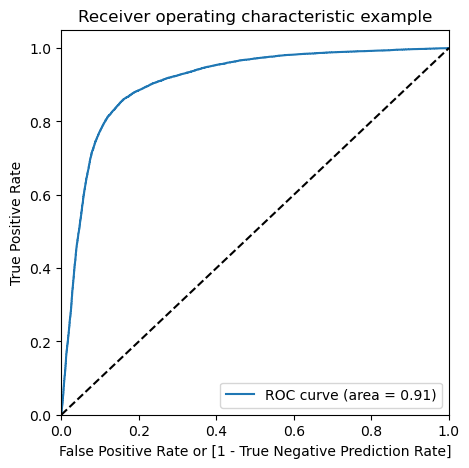

In [175]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

##### Finding Optimal Cutoff Point


In [176]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.118320,0,1,1,0,0,0,0,0,0,0,0
1,0,0.502170,1,1,1,1,1,1,1,0,0,0,0
2,0,0.248270,0,1,1,1,0,0,0,0,0,0,0
3,0,0.479362,0,1,1,1,1,1,0,0,0,0,0
4,0,0.524633,1,1,1,1,1,1,1,0,0,0,0


In [177]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.709172  0.979002     0.439341   
0.2  0.2          0.769520  0.957227     0.581813   
0.3  0.3          0.804412  0.932808     0.676016   
0.4  0.4          0.831450  0.906211     0.756688   
0.5  0.5          0.846459  0.874430     0.818488   
0.6  0.6          0.847263  0.824295     0.870230   
0.7  0.7          0.829272  0.747926     0.910618   
0.8  0.8          0.762287  0.579946     0.944629   
0.9  0.9          0.618779  0.259643     0.977914   


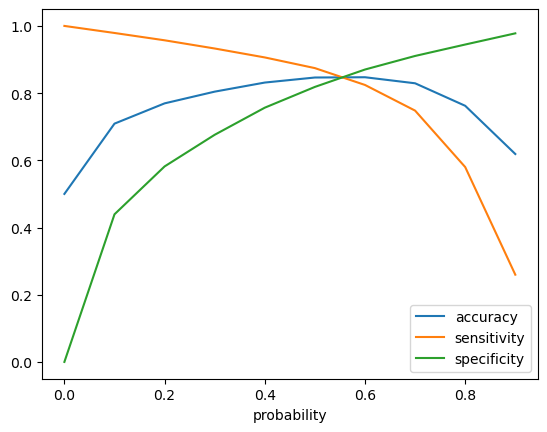

In [178]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Initially we selected the optimm point of classification as 0.5.

From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.

In [179]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.118320,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.502170,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.248270,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.479362,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.524633,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0


In [180]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50  0.50         0.846459  0.874430     0.818488   
0.51  0.51         0.847418  0.870489     0.824347   
0.52  0.52         0.848377  0.866497     0.830257   
0.53  0.53         0.849466  0.862401     0.836530   
0.54  0.54         0.849673  0.857891     0.841456   
0.55  0.55         0.849673  0.852655     0.846692   
0.56  0.56         0.848922  0.846951     0.850892   
0.57  0.57         0.848973  0.842078     0.855869   
0.58  0.58         0.848585  0.836686     0.860483   
0.59  0.59         0.847859  0.830153     0.865564   


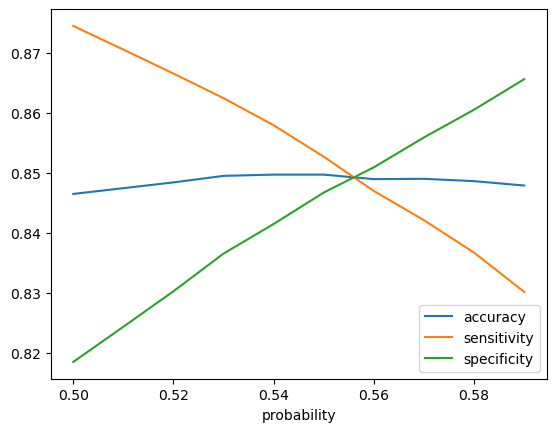

In [181]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.54



In [182]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.118320,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.502170,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.248270,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.479362,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.524633,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [183]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8496733720447947


In [184]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16230  3058]
 [ 2741 16547]]


In [185]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8578909166321028
Specificity =  0.8414558274574865
False Positive Rate =  0.1585441725425135
Precision =  0.8440193828105075
True Negative Prediction Rate =  0.8555163143745718


Precision and recall tradeoff


In [186]:
from sklearn.metrics import precision_recall_curve


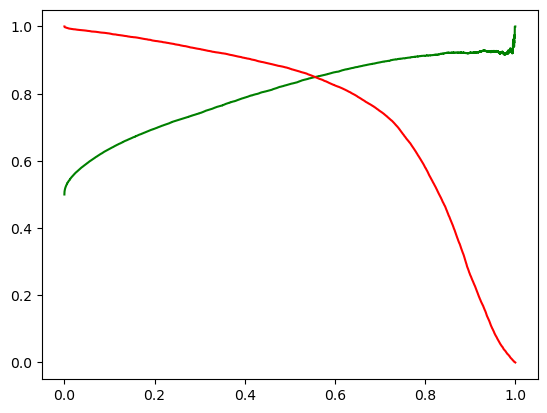

In [187]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making predictions on the test set


##### Transforming and feature selection for test data



In [188]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

KeyError: "['mobile_number', 'arpu_6', 'arpu_7', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'aon', 'sep_vbc_3g', 'total_rech_amt_data_6', 'total_rech_amt_data_7'] not in index"

In [189]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_8,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_mou_6,loc_og_mou_8,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_7,isd_og_mou_6,og_others_6,total_og_mou_6,total_og_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_7,monthly_2g_8,sachet_2g_6,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,overall_rech_amt_7,avg_arpu_6_7
35865,16.983,0.00,28.53,5.56,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.46,0.00,0.00,0.0,0.00,0.0,0.00,183.64,0.75,15.14,9.51,3.46,24.76,14.99,0.10,57.01,57.11,0.0,5.0,7.0,2.0,90.0,25.0,10.0,10.0,0.0,1.0,17.0,34.0,42.333333,86.33,323.22,0.00,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,710.0,132.0560
41952,322.354,42.83,93.21,230.78,0.0,0.00,0.00,0.00,22.13,19.08,1.36,0.00,44.18,41.59,10.34,0.0,207.48,0.0,0.00,135.28,127.33,13.46,48.49,0.00,173.21,118.71,23.85,27.88,51.73,0.0,3.0,6.0,4.0,200.0,150.0,145.0,86.0,50.0,1.0,152.0,145.0,145.000000,29.16,22.61,37.86,292.16,0.0,0.0,1.0,1.0,1.0,0.0,0.0,148.18,522.0,361.7570
98938,502.969,309.09,90.74,246.11,0.0,0.00,0.00,0.00,87.71,261.48,1.06,0.00,114.71,350.89,1.13,0.0,4.09,0.0,0.00,114.91,350.89,260.14,1009.51,4.03,429.24,988.16,0.23,21.85,22.08,0.0,7.0,11.0,7.0,252.0,252.0,252.0,30.0,130.0,2.0,252.0,252.0,504.000000,58.72,199.95,467.01,1590.69,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1602.15,949.0,668.5390
29459,250.437,7.86,13.28,37.01,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.06,148.86,0.00,0.00,0.0,0.00,0.0,1.15,163.29,11.23,12.09,2.19,0.20,12.09,0.20,67.83,0.00,67.83,0.0,9.0,10.0,5.0,179.0,179.0,154.0,0.0,154.0,3.0,179.0,154.0,256.000000,6.04,7.58,67.87,1032.04,0.0,1.0,0.0,0.0,0.0,0.0,0.0,520.38,1336.0,299.7535
70682,1017.601,90.64,705.99,2345.36,0.0,2.75,208.94,110.01,45.76,148.09,0.00,1.06,89.26,194.79,0.00,0.0,1885.96,0.0,0.00,748.63,2212.81,133.61,448.46,3.11,157.64,356.76,9.86,4.14,14.01,0.5,5.0,15.0,12.0,110.0,110.0,130.0,0.0,130.0,1.0,0.0,23.0,23.000000,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1437.0,745.2565


In [190]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

##### Predicting the target variable



In [191]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 35865    1.0
41952    0.0
98938    0.0
29459    0.0
70682    0.0
58317    0.0
4860     0.0
16890    1.0
61329    1.0
94332    0.0
dtype: float64


In [192]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
35865,1.0
41952,0.0
98938,0.0
29459,0.0
70682,0.0


In [193]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})


In [194]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [195]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
35865,0,1.0
41952,0,0.0
98938,0,0.0
29459,0,0.0
70682,0,0.0


In [196]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,1.0,1
41952,0,0.0,0
98938,0,0.0,0
29459,0,0.0,0
70682,0,0.0,0


In [197]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8479057882457505